# XPorter traffic volume problem

In [1]:
from sys import path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
model_dir = 'sample_code_submission/'                    
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

In [6]:
from data_io import read_as_df
data_dir = './all_data'         
data_name = 'xporters'
data = read_as_df(data_dir  + '/' + data_name)               

Reading ./all_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


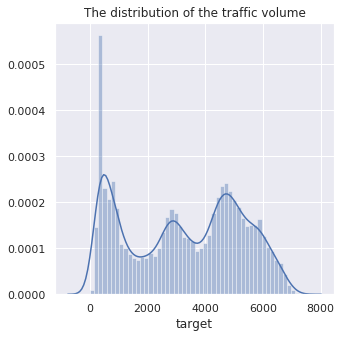

In [7]:
plt.figure(figsize = (5,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

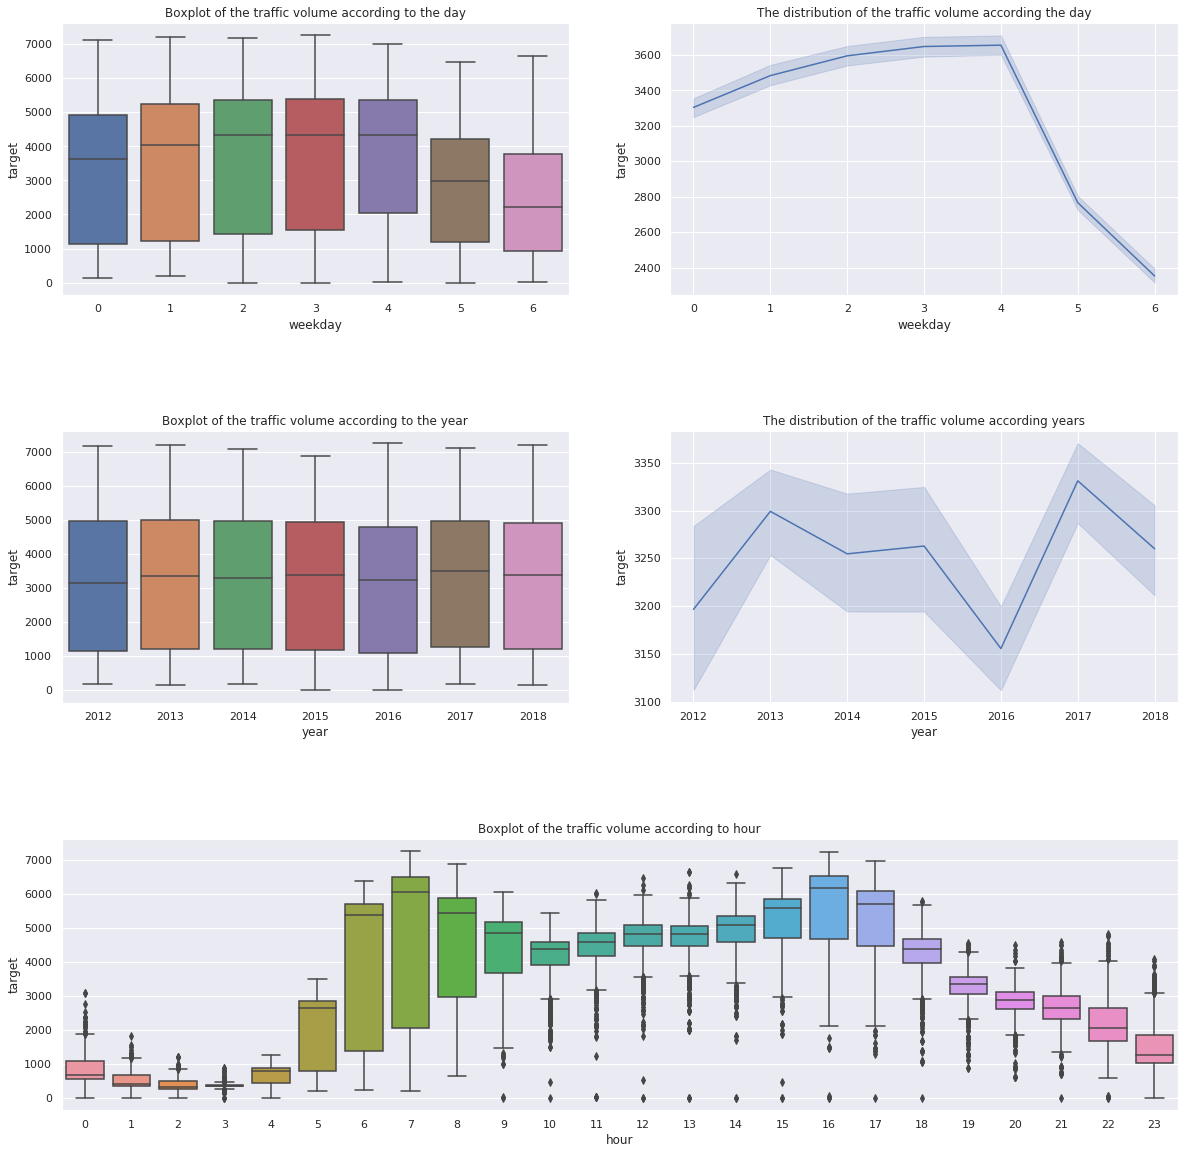

In [8]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

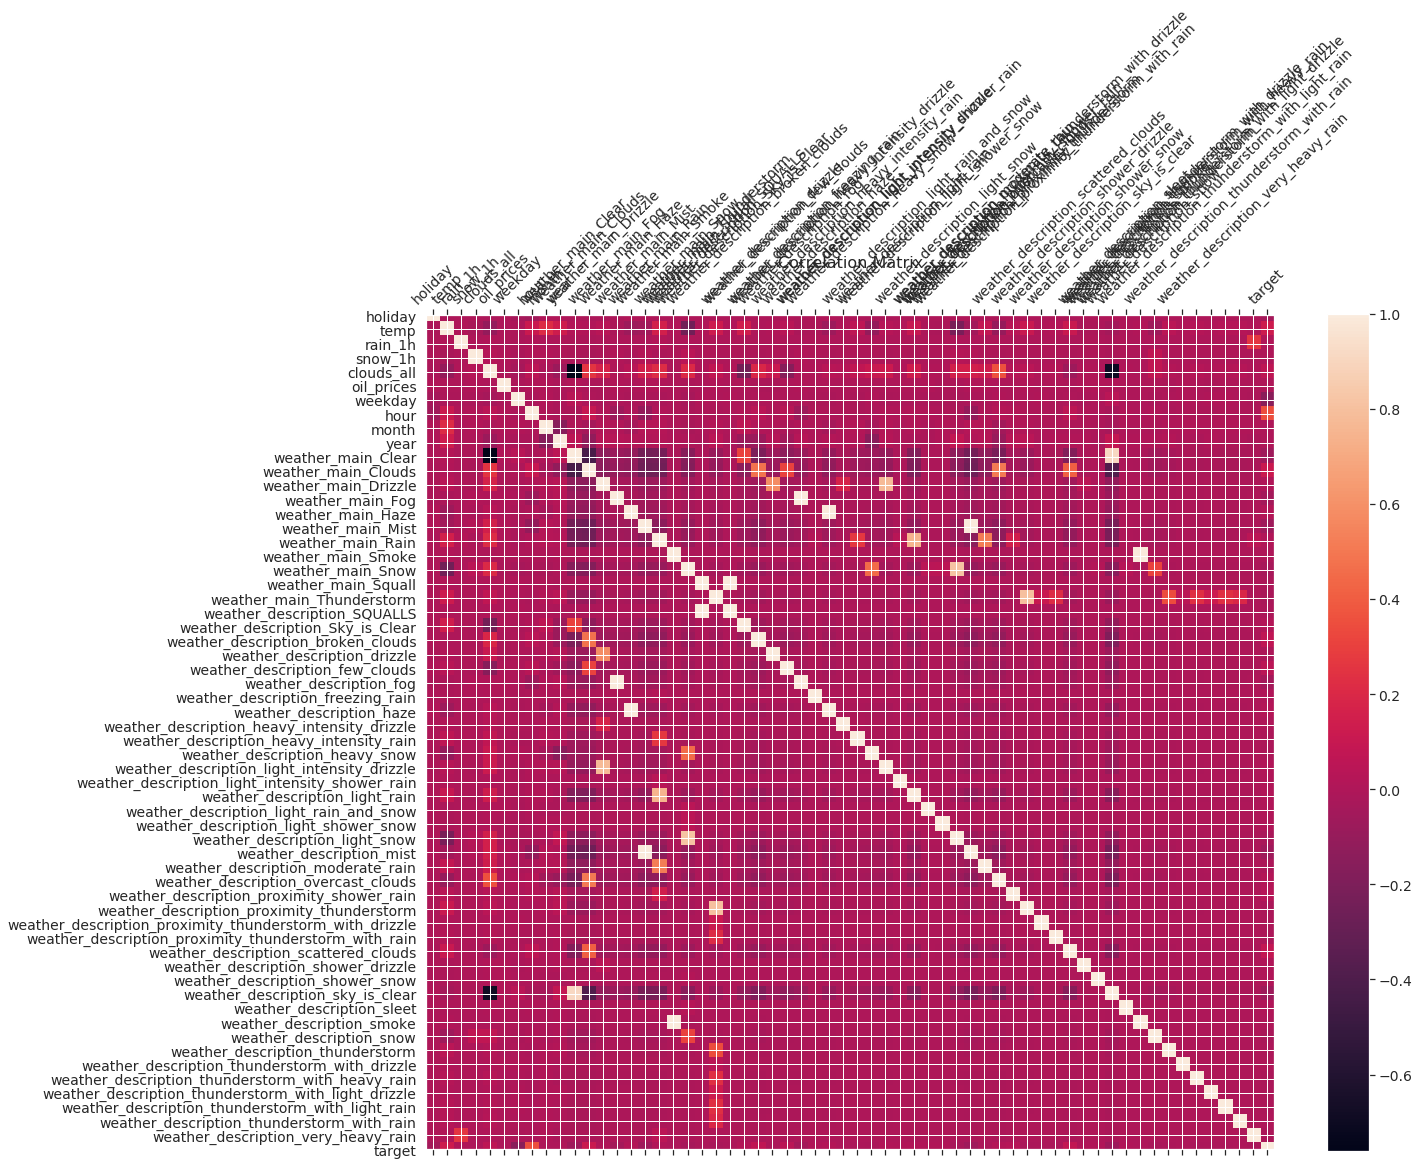

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_tsne = TSNE(learning_rate=100).fit_transform(data)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data.target)

KeyboardInterrupt: 

In [ ]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#features = data.columns[0:len(data.columns)-1]
#x = data.loc[:, features].values
#y = data.loc[:,['target']].values

scaler = StandardScaler()
scaler.fit(data)
StandardScaler(copy=True ,with_mean=True ,with_std =True )
scaled_data =scaler.transform(data)

pca = PCA()
pca.fit(scaled_data)

In [ ]:
x_pca =pca. transform(scaled_data)
pca.explained_variance_ratio_

In [ ]:

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [ ]:
n_pcs= pca.n_components_
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
X = data[data.columns[0:len(data.columns)-1]].values
Y = data[data.columns[-1]].values
X_new=SelectKBest(score_func=f_regression,k=47).fit_transform(X,Y)
initial_feature_names = data.columns
for i in initial_feature_names:
    for j in range(47):
         a = np.equal(X_new[:,j],data[i].values)
    if a[j] :
        print(i)

In [ ]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

#DecisionTreeRegressor 
from sklearn import tree

#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#ExtraTreesRegressor 
from sklearn.ensemble import ExtraTreesRegressor

#BaggingRegressor
from sklearn.ensemble import BaggingRegressor

#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

model_name = ["KNeighbors", "DecisionTree ", "RandomForest", "GradientBoosting",
         "ExtraTrees","Bagging","AdaBoost"]

model_list = [
    KNeighborsRegressor(),
    tree.DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    BaggingRegressor(),
    AdaBoostRegressor()
]


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np 
import matplotlib.pyplot as plt 
scores = []
for i in range(len(model_list)):
    scores.append(cross_val_score(model_list[i], X_train, Y_train, cv=5, scoring=make_scorer(scoring_function)))
score = np.array(scores)

In [ ]:
mean= np.empty(len(model_list))
var = np.empty(len(model_list))
for i in range(len(model_list)):
    mean[i] = np.mean(score[i,:])
    var[i] = np.var(score[i,:])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax= sns.barplot(x=model_name,
            y=var)
plt.xlabel('Modèles', fontsize=16)
plt.ylabel('Variance ', fontsize=16)
plt.savefig('var.png',dpi=500)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.barplot(x=model_name,
            y=mean)
plt.xlabel('Modèles', fontsize=16)
plt.ylabel('Score ', fontsize=16)
plt.savefig('score.png',dpi=500)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_estimators' :[40,50,60],'n_jobs':[-1,1],'warm_start':[True,False]}
model = BaggingRegressor()
clf = GridSearchCV(model,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)